In [30]:
# Multiclass classification .


import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



ModuleNotFoundError: No module named 'intertools'

In [31]:
!pip install intertools

ERROR: Could not find a version that satisfies the requirement intertools (from versions: none)
ERROR: No matching distribution found for intertools


In [2]:
# USING THE FASHION MNIST DATASET TO GET STARTED

(train_data, train_labels ), (test_data,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_data[0].shape,train_labels[0].shape

((28, 28), ())

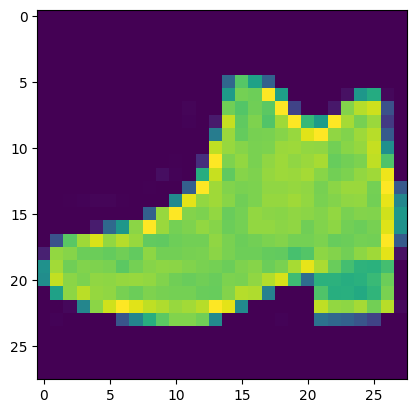

In [4]:
#plot a single sample
plt.imshow(train_data[15])

In [5]:
class_names = ["T-short/top","Trouser","Pullover","Dress","Coat","sandal","shirt","Sneaker","Bag","Ankle boot"]

index is 18980
index is 6016
index is 25510
index is 21450


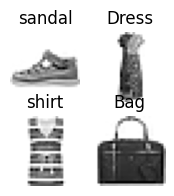

In [6]:
import random
plt.figure(figsize=(2,2))
for i in range(4):
  ax= plt.subplot(2,2,i+1)
  index= random.choice(range(len(train_data)))
  print("index is",index)
  plt.imshow(train_data[index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[index]])
  plt.axis(False)

In [7]:
##Building a multiclass classification model

# Input shape is 28x 28
# output shape is 10 ,1 class per clothing
# loss function : Categorical Cross entropy()(not binary)
#Out put layer activation : softmax (not sigmoid)

In [8]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28)),
          tf.keras.layers.Dense(4,activation="relu"),
          tf.keras.layers.Dense(4,activation="relu"),
          tf.keras.layers.Dense(10,activation="softmax")
])


model_10.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer =tf.keras.optimizers.Adam(),
                 metrics =["accuracy"])

model_10.fit(train_data,
             train_labels,
             epochs =10,
             validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3109 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [9]:
#Another way of using CategorialCross Entropy , we need to one hot encode the labesl

tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28)),
          tf.keras.layers.Dense(4,activation="relu"),
          tf.keras.layers.Dense(4,activation="relu"),
          tf.keras.layers.Dense(10,activation="softmax")
])


model_10.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer =tf.keras.optimizers.Adam(),
                 metrics =["accuracy"])

non_norm_history = model_10.fit(train_data,
             tf.one_hot(train_labels,depth=10),
             epochs =10,
             validation_data=(test_data,tf.one_hot(test_labels,depth =10)))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3426 - accuracy: 0.1174 - val_loss: 2.2316 - val_accuracy: 0.1355
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2104 - accuracy: 0.1410 - val_loss: 2.1612 - val_accuracy: 0.1565
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9946 - accuracy: 0.1995 - val_loss: 1.8173 - val_accuracy: 0.2413
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7712 - accuracy: 0.2306 - val_loss: 1.7410 - val_accuracy: 0.2248
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6873 - accuracy: 0.2607 - val_loss: 1.6349 - val_accuracy: 0.3061
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6089 - accuracy: 0.2885 - val_loss: 1.5800 - val_accuracy: 0.3156
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5704 - accuracy: 0.3065 - val_loss: 1.5542 - val_accuracy:

In [10]:
model_10.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
#Normalize the data
train_data_norm= train_data/255.0
test_data_norm = test_data/255.0

In [12]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28)),
          tf.keras.layers.Dense(4,activation="relu"),
          tf.keras.layers.Dense(4,activation="relu"),
          tf.keras.layers.Dense(10,activation="softmax")
])


model_11.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer =tf.keras.optimizers.Adam(),
                 metrics =["accuracy"])


norm_history = model_11.fit(train_data_norm,
             tf.one_hot(train_labels,depth=10),
             epochs =10,
             validation_data=(test_data_norm,tf.one_hot(test_labels,depth =10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6239 - accuracy: 0.3587 - val_loss: 1.4097 - val_accuracy: 0.4460
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2858 - accuracy: 0.4948 - val_loss: 1.2229 - val_accuracy: 0.5901
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0723 - accuracy: 0.6133 - val_loss: 0.9963 - val_accuracy: 0.6147
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9477 - accuracy: 0.6338 - val_loss: 0.9283 - val_accuracy: 0.6417
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8759 - accuracy: 0.6759 - val_loss: 0.8495 - val_accuracy: 0.7138
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8022 - accuracy: 0.7258 - val_loss: 0.8054 - val_accuracy: 0.7278
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7632 - accuracy: 0.7343 - val_loss: 0.7878 - val_accuracy:

<Axes: title={'center': 'Non Normalized'}>

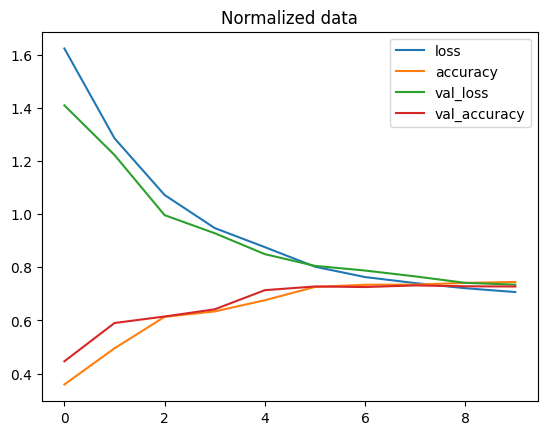

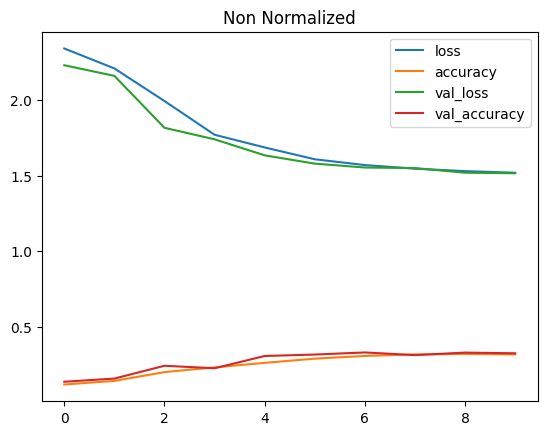

In [13]:
df = pd.DataFrame(norm_history.history).plot(title="Normalized data")

pd.DataFrame(non_norm_history.history).plot(title="Non Normalized")

In [15]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28)),
          tf.keras.layers.Dense(4,activation="relu"),
          tf.keras.layers.Dense(4,activation="relu"),
          tf.keras.layers.Dense(10,activation="softmax")
])


model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer =tf.keras.optimizers.Adam(),
                 metrics =["accuracy"])

### Create the learning rate callback

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20) )

find_lr_history = model_12.fit(train_data_norm,
                                train_labels,
                                 epochs =40,
                               validation_data=(test_data_norm,test_labels),
                               callbacks= lr_schedular)

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2854 - accuracy: 0.5171 - val_loss: 0.9224 - val_accuracy: 0.6364 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8387 - accuracy: 0.6716 - val_loss: 0.8329 - val_accuracy: 0.6763 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7722 - accuracy: 0.7136 - val_loss: 0.7919 - val_accuracy: 0.7053 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7293 - accuracy: 0.7337 - val_loss: 0.7602 - val_accuracy: 0.7286 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7104 - accuracy: 0.7403 - val_loss: 0.7324 - val_accuracy: 0.7348 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6942 - accuracy: 0.7462 - val_loss: 0.7467 - val_accuracy: 0.7390 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

In [20]:
#plot leaning rate decay curve

lrs = 1e-3*(10**(tf.range(40)/20))

Text(0.5, 1.0, 'Findingt the ideal learning rate')

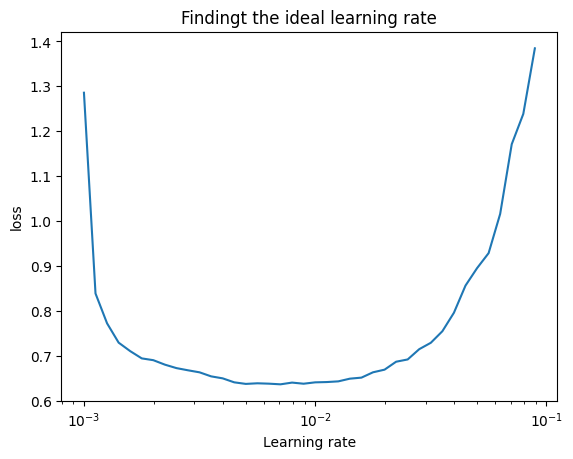

In [21]:
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel('Learning rate')
plt.ylabel("loss")
plt.title("Findingt the ideal learning rate")

In [25]:
### Refit with ideal learning rate

tf.random.set_seed(42)
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_13.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

model_13.fit(train_data_norm,train_labels,epochs=20,
             validation_data =(test_data_norm,test_labels
                               ))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2112 - accuracy: 0.5896 - val_loss: 0.8690 - val_accuracy: 0.7023
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7799 - accuracy: 0.7319 - val_loss: 0.7361 - val_accuracy: 0.7476
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6597 - accuracy: 0.7678 - val_loss: 0.6642 - val_accuracy: 0.7615
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6076 - accuracy: 0.7819 - val_loss: 0.6241 - val_accuracy: 0.7790
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5852 - accuracy: 0.7893 - val_loss: 0.6296 - val_accuracy: 0.7789
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5687 - accuracy: 0.7966 - val_loss: 0.5963 - val_accuracy: 0.7900
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5567 - accuracy: 0.8021 - val_loss: 0.6250 - val_accuracy:

In [38]:
##Evalauating multiclass model, Remember to make predicitons on the same kind of data your model was trained on
##Eg if your model is trained on normalized data then predict on normalized data

y_preds = model_13.predict(test_data_norm)
y_preds[0]

313/313 [==============================] - 1s 3ms/step


array([1.2101774e-08, 5.1416591e-13, 1.0200841e-09, 2.9837748e-15,
       3.4879434e-17, 2.3120183e-01, 1.6561745e-12, 1.0704104e-01,
       1.1252397e-03, 6.6063190e-01], dtype=float32)

In [40]:
class_names[tf.argmax(y_preds[0])]

'Ankle boot'

In [71]:
#Plotting confusion matrix to identify false positives and false negatibes
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true,y_preds,classes= None):
    cm= confusion_matrix(y_true,tf.round(y_preds))
    cm_norm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
    n_classes = cm.shape[0]

    fig,ax =plt.subplots(figsize =(15,15))
    cax= ax.matshow(cm,cmap=plt.cm.Blues)
    fig.colorbar(cax)

    if classes:
      labels = classes
    else:
      labels = np.arange(n_classes)

      print(labels)
    ax.set(title ="Confusion Matrix",
            xlabel="Predicted label",
            ylabel ="True label",
            xticks=np.arange(n_classes),
            yticks=np.arange(n_classes),
            xticklabels = labels,
            yticklabels=labels)


    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(20)
    ax.title.set_size(20)

    threshold= (cm.max()+cm.min())/2.0

    for i,j in itertools.product(range(n_classes),range(cm.shape[1])):
        plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
                horizontalalignment ="center",
                color="white" if cm[i,j]> threshold else "black",
                size=15 )

In [46]:
ypreds = y_preds.argmax(axis=1)
ypreds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [47]:
confusion_matrix(test_labels,ypreds)

array([[725,   0,  11, 130,   7,   2, 118,   0,   7,   0],
       [  6, 939,   7,  39,   6,   0,   2,   0,   1,   0],
       [ 13,   2, 638,  27, 191,   0, 125,   0,   4,   0],
       [ 38,  17,   7, 861,  35,   0,  37,   2,   3,   0],
       [  1,   7,  72,  36, 806,   0,  76,   0,   2,   0],
       [  1,   0,   0,   1,   0, 899,   0,  56,  14,  29],
       [153,   1, 106,  86, 151,   0, 495,   0,   8,   0],
       [  0,   0,   0,   0,   0,  29,   0, 946,   0,  25],
       [ 20,   0,  39,   7,   1,  12,  26,   8, 887,   0],
       [  0,   0,   0,   0,   0,  18,   1,  56,   0, 925]])

In [62]:
class_names


['T-short/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'sandal',
 'shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

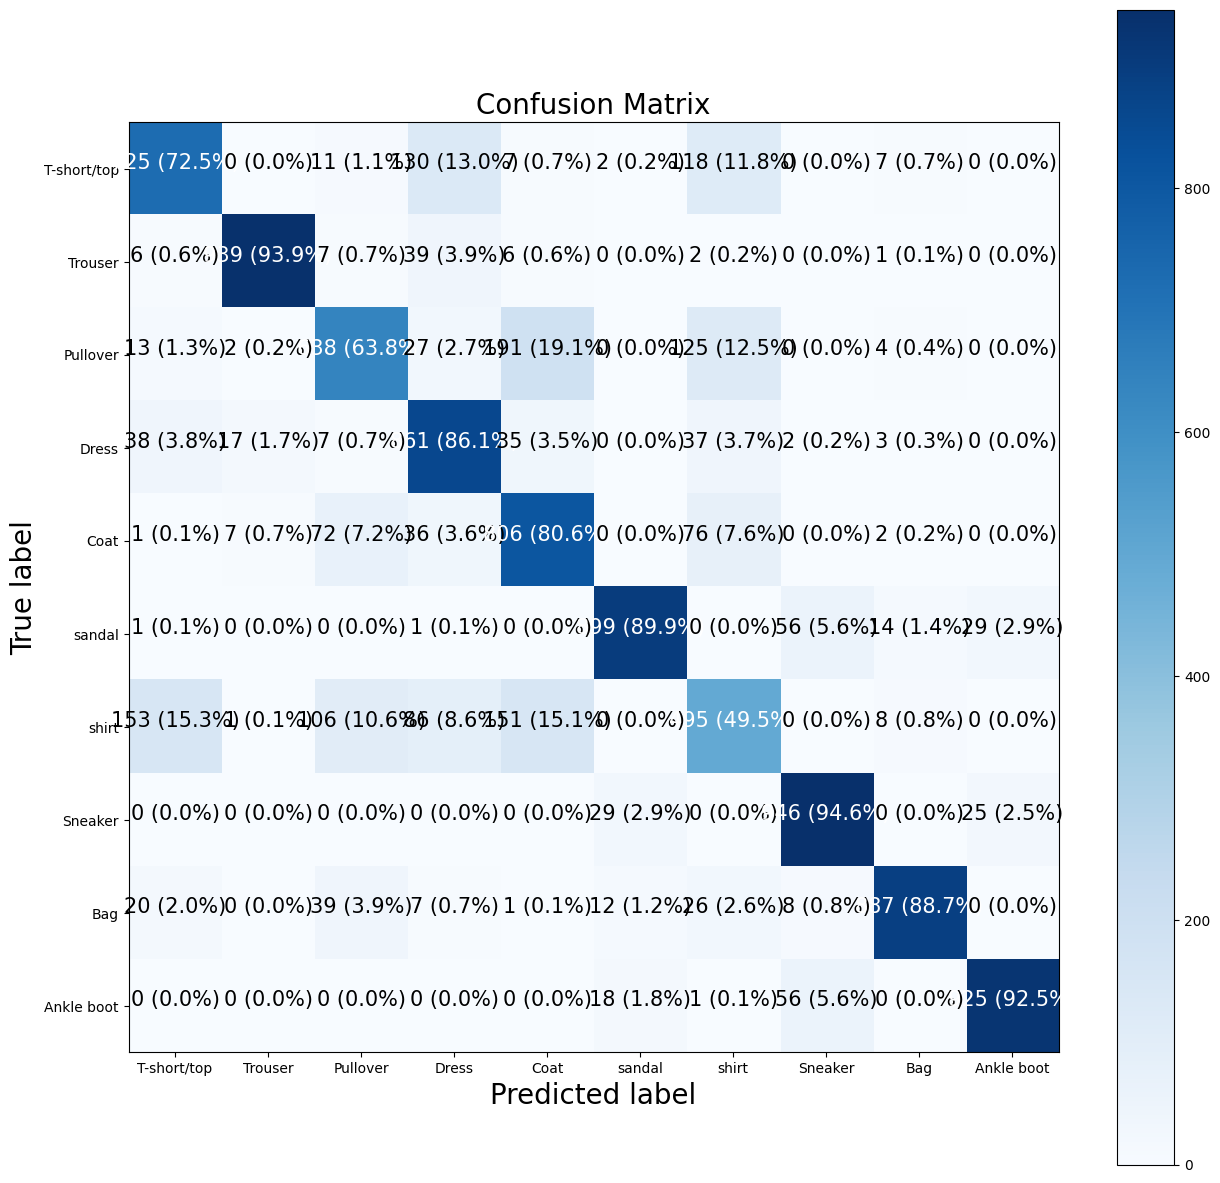

In [72]:
make_confusion_matrix(y_true =test_labels,
                      y_preds = ypreds,
                      classes= class_names,
                     )

In [56]:
ypreds = y_preds.argmax(axis=1)
ypreds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [83]:
import random


def plot_random_image(model,images,true_labels,classes):
  """Picks a random imagee, plots it , labesl it with a prediction and truth label"""

  i = random.randint(0,len(images))


  target_image = images[i]
  pred_probs= model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image,cmap=plt.cm.binary)

  #Change the color of the tit;es depending on prediction is right or wrong
  #argmax , gives the index at which it is max , while reduce_max gives the value at that max index

  if pred_label == true_label:
    color= "green"
  else:
     color = "red"


  plt.xlabel("Pred:{}{:2.0f}% (True:{})".format(pred_label,
                                                100*tf.reduce_max(pred_probs),
                                                true_label)
  ,color= color)


1/1 [==============================] - 0s 31ms/step


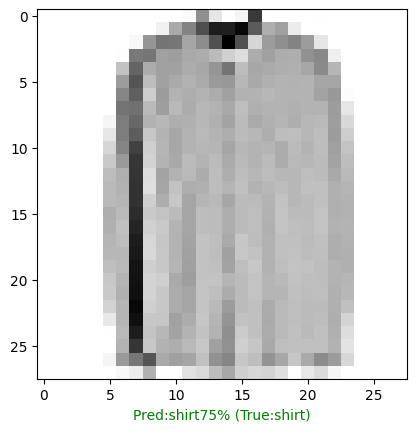

In [98]:
plot_random_image(model = model_13,
                  images = test_data_norm,
                  true_labels= test_labels,
                  classes = class_names)

In [99]:
#Extract a particular layer
model_13.layers

In [102]:
model_13.layers[1]

In [107]:
weights, biases = model_13.layers[1].get_weights()
weights,weights.shape



(array([[ 9.6243352e-02, -6.9504596e-02, -8.5220456e-01, -5.3533912e-04],
        [-1.1884704e+00, -2.6373503e-01, -1.9794424e-01,  5.0511128e-01],
        [ 3.1776566e-02,  5.0976574e-01, -1.4417992e+00,  4.9069073e-02],
        ...,
        [ 4.5255831e-01, -4.1277539e-02,  3.5702594e-02,  3.7245905e-01],
        [ 7.0145762e-01, -5.8928931e-01, -3.5291916e-01,  4.7885692e-01],
        [ 2.7066985e-01,  2.5642028e-01, -4.0607318e-01, -3.7669078e-02]],
       dtype=float32),
 (784, 4),
 array([0.8726271, 1.8668832, 1.9600668, 1.6244277], dtype=float32),
 (4,))

In [109]:
biases,biases.shape

(array([0.8726271, 1.8668832, 1.9600668, 1.6244277], dtype=float32), (4,))